In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
from config import Essex_Shape_Config, Web_Scrape_Config
from clean_job_data import job_data_w_geog
from scipy import stats

# Get Job Scrape Data
Job scrape data is from indeed, number of pages parameters have been restricted

In [2]:
# Print list, manually change list and change code to append data that has been blocked
gdf = job_data_w_geog()
print(gdf.shape)
gdf.head()

(36413, 18)


,search_term,job_title,wage,wage_freq,company,location,desc,FID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,Basildon,Warehouse Operative FTC (Fixed Term Contract) ...,10.5,hour,Amazon,Tilbury,"As part of our team, you will help us continue...",93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
1,Basildon,Dog walking,NaN,NaN,Mrs Paws,Billericay,You must have a full UK driving licence with n...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
2,Basildon,Office Administrator/PA,21000.0,year,BDM,Wickford,Be able to work alone and manage queries from ...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
3,Basildon,Warehouse Operative,30000.0,year,TW ROAD HAULAGE,NaN,Monday - Friday plus Saturdays hours to be dis...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
4,Basildon,"Customer Assistant, 11 to 20 hours, Laindon",10.1,hour,Lidl,NaN,You’ll put in a shift as part of the team to c...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."


# Wage

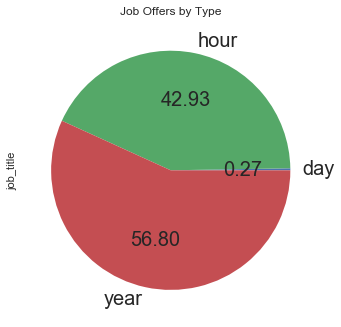

In [3]:
matplotlib.style.use("seaborn")
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams['font.size'] = 20

gdf.wage_freq.fillna("N/A")
ax = gdf.groupby('wage_freq').count().job_title.plot(kind='pie', autopct='%.2f').set_title("Job Offers by Type")
ax.figure.savefig('file.png', transparent=True)


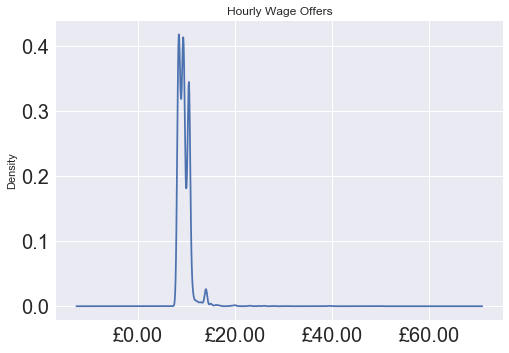

In [4]:
gdf_hour = gdf[gdf.wage_freq.eq("hour")]
ax = gdf_hour.wage.plot.kde()
ax.set_title("Hourly Wage Offers")
#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.2f')
ax.xaxis.set_major_formatter(formatter)

ax.figure.savefig('file.png', transparent=True)


In [6]:
# gdf_hour.loc[(gdf_hour['wage'] ==50)]
stats.describe(gdf_hour.wage)

DescribeResult(nobs=9170, minmax=(8.21, 50.0), mean=9.571066521264996, variance=2.632051736222274, skewness=7.4350883276918704, kurtosis=114.72662981519574)

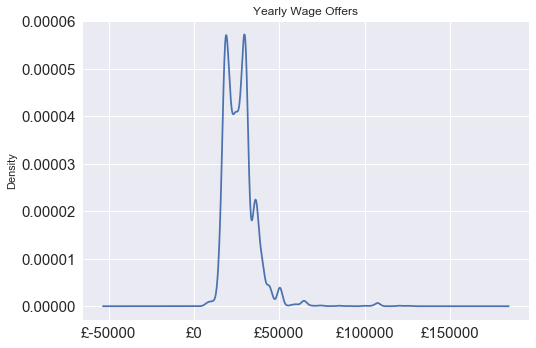

In [7]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams['font.size'] = 20

gdf_year = gdf[gdf.wage_freq.eq("year")]
ax = gdf_year.wage.plot.kde()
ax.set_title("Yearly Wage Offers")
#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.0f')
ax.xaxis.set_major_formatter(formatter)

ax.figure.savefig('file.png', transparent=True)


In [8]:
gdf_year.loc[(gdf_year['wage'] ==6080.0)]
# stats.describe(gdf_year.wage)

,search_term,job_title,wage,wage_freq,company,location,desc,FID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
4451,Braintree,Part Time Minibus Driver,6080.0,year,Felsted School,NaN,Due to the size and weight of the Schools’ min...,94,E07000067,Braintree,None,577253,227335,0.575911,51.9163,1.607073e+09,273423.537132,"POLYGON ((0.78147 51.96651, 0.78179 51.96635, ..."


# Employer

In [9]:
unique_jobs_df = gdf[['job_title','wage', "wage_freq", "company", "location", "desc"]]
unique_jobs_df.drop_duplicates(keep="first", inplace=True)
gdf.shape

/Users/ysohoye/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(36413, 18)

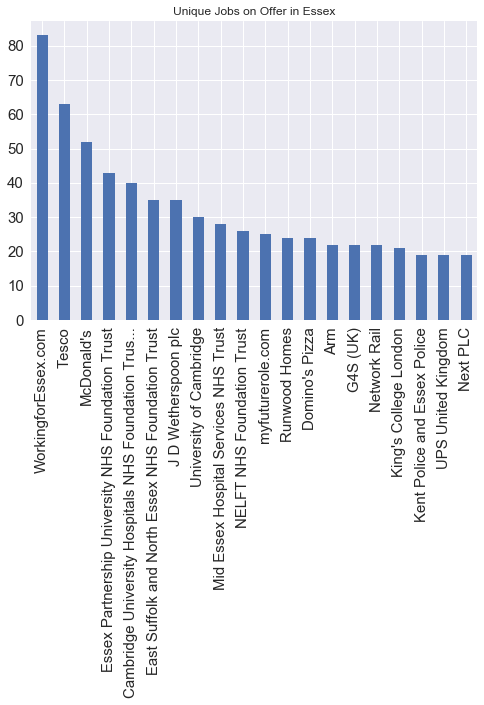

In [10]:

comp_freq = unique_jobs_df.company.value_counts()
tip_comp_freq = comp_freq.nlargest(20)
ax = tip_comp_freq.plot.bar()
ax.set_title("Unique Jobs on Offer in Essex")

ax.figure.savefig('file.png', transparent=True, bbox_inches = "tight")


# Kepler

In [11]:
from keplergl import KeplerGl
map_1 = KeplerGl()

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [12]:
shape_gdf = gpd.read_file(Essex_Shape_Config.LAU_SHP_FILE)
shape_gdf.replace({'LAD19NM': {"Epping Forest": "Epping"}}, inplace = True) #epping is shortened in scraping

In [13]:
mean_df_hour = gdf_hour.groupby('search_term').mean()
mean_df_hour = mean_df_hour.reset_index()
mean_df_hour_merge = pd.merge(mean_df_hour,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
mean_df_hour_merge = gpd.GeoDataFrame(mean_df_hour_merge)
mean_df_hour_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)

In [14]:
mean_df_year = gdf_year.groupby('search_term').mean()
mean_df_year = mean_df_year.reset_index()
mean_df_year_merge = pd.merge(mean_df_year,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
mean_df_year_merge = gpd.GeoDataFrame(mean_df_year_merge)
mean_df_year_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)

In [15]:
freq_df = gdf.groupby('search_term').count()
freq_df = freq_df.reset_index()
freq_df_merge = pd.merge(freq_df,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
freq_df_merge = gpd.GeoDataFrame(freq_df_merge)
freq_df_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)

In [ ]:
map_1.add_data(data=freq_df_merge, name='Jobs_Freq_count')
map_1.add_data(data=mean_df_year_merge, name='Jobs_Year_Average')
map_1.add_data(data=mean_df_hour_merge, name='Jobs_Hour_Average')

In [ ]:
from datetime import datetime, date
date ="{:%Y_%m_%d}".format(datetime.now())

# map_1
map_1.save_to_html(file_name=f'output/esx_job_{date}.html')